# Data Analytics: EU Dairy Industry Snapshot, 2016 to 2020
### Joseph Nolan (josephnolan10@gmail.com)
- https://github.com/josephnolan10/UCDPA_JosephNolan
- 7th June 2022

---

## 1. Data

### This project combines two datasets:

- Annual changes in cow numbers in the EU from 1998 to 2020 (CSV converted from XLSX source) __[link](https://ahdb.org.uk/dairy/uk-and-eu-cow-numbers)__
- A data table of tons of dairy milk produced in the EU from 2016 to 2021 scraped from __[link]('https://www.clal.it/en/index.php?section=consegne_eu')__

In [1]:
# We will import Pandas to build our datasets
import pandas as pd

# Import Numpy
import numpy as np

# Import Matplotlib
import matplotlib.pyplot as plt

# Import Seaborn
import seaborn as sns


---

## 2. Importing
### Import data from a flat file (.csv, .xls, xlsx, .txt, etc.)

In [2]:
# DataFrame from a CSV
# These figures from the Agriculture and Horticulture Development Board in the UK
# track annual changes in cow numbers in the UK and within the EU from 1998 to 2020.

# The dataset was downloaded as an .xlsx and then exported to CSV format
# Source: https://ahdb.org.uk/dairy/uk-and-eu-cow-numbers

eu_dairy_cows = pd.read_csv("Data/EU_Dairy_Cow_Numbers.csv", index_col = 0, dtype='unicode')

### Retrieve data using online SQL, APIs, or web scraping

In [3]:
# European Drinking milk production data, both in tables and charts at CLAL.it
# Clal are an Italian Dairy Economic Consulting firm that analyzes the Dairy Market.
# The data shows the EU Production of Drinking milk (Tons) per country.

URL = 'https://www.clal.it/en/index.php?section=consegne_eu&p=D2100__THS_T'
eu_milk_production = pd.read_html(URL, header = 1, index_col = 0) # header = 1 and index_col = 0 set the correct indexs.
df_eu_milk = eu_milk_production[0]

---

## 3. Preparation

### Create pandas DataFrames (one for CSV and one for a scraped table from a webpage)

In [4]:
# Create the DataFrame for EU Cow Numbers CSV.
# Data source: https://ahdb.org.uk/dairy/uk-and-eu-cow-numbers (converted to CSV from XLSX).
# Note, these figures are abreviated by 3 decimals. For example 300 represents 300,000.

eu_dairy_cows

# From scanning through the dataset we can see that Croatia's data range is blank up until 2007.
# Croatia joined the EU in 2013.
# The UK's 2020 data entry is blank, coinciding with Brexit.

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,Unnamed: 24,Annual change,% change
Country,,,,,,,,,,,,,,,,,,,,,
Austria,729,698,621,598,589,558,538,534,527,525,...,538,534,540,543,533,524,525,NaN,1,0.10%
Belgium,632,619,629,611,591,572,571,548,532,524,...,519,529,531,519,529,538,541,NaN,3,0.60%
Bulgaria,421,431,363,359,358,362,369,348,350,336,...,302,283,279,261,244,227,242,NaN,15,6.80%
Croatia,:,:,:,:,:,:,:,:,:,225,...,159,152,147,139,136,130,129,NaN,-1,-0.80%
Cyprus,24,24,24,24,26,27,26,25,24,24,...,25,26,28,30,32,35,37,NaN,2,4.80%
Czechia,583,548,529,496,464,449,429,437,417,407,...,372,369,367,365,359,361,357,NaN,-4,-1.20%
Denmark,680,681,644,628,613,589,569,558,555,551,...,547,570,565,575,570,563,565,NaN,2,0.40%
Estonia,159,138,131,129,116,117,117,113,109,103,...,96,91,86,86,85,85,84,NaN,-1,-0.80%
Finland,380,374,358,352,343,328,318,313,298,288,...,283,282,275,271,264,259,256,NaN,-3,-1.30%


In [5]:
# Create a DataFrame for the EU Milk Production scraped from clal.it
# Data source: https://www.clal.it/en/index.php?section=consegne_eu

df_eu_milk.index.rename('Country', inplace=True) # This fixes the index, which was originally all upper case letters
df_eu_milk

,2016,2017,2018,2019,2020,2021,2021.1,2022,Var %,Period,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
Country,,,,,,,,,,,,,,
Austria,786.330,781.980,796.300,784.770,829.840,765.740,196.430,195.800,"-0,3%",Jan - Mar '22,NaN,NaN,NaN,NaN
Belgium,688.770,678.260,673.130,676.460,717.450,648.560,170.020,169.430,"-0,3%",Jan - Mar '22,NaN,NaN,NaN,NaN
Bulgaria,68.370,66.110,74.950,74.920,76.100,77.280,21.900,18.240,"-16,7%",Jan - Mar '22,NaN,NaN,NaN,NaN
Croatia,223.410,222.560,217.550,224.080,230.600,215.330,57.430,60.460,"+5,3%",Jan - Mar '22,NaN,NaN,NaN,NaN
Cyprus,63.600,87.160,58.190,56.710,55.520,54.440,13.800,12.610,"-8,6%",Jan - Mar '22,NaN,NaN,NaN,NaN
Czech Republic,636.180,650.160,635.420,613.990,624.590,626.840,207.150,229.770,"+10,9%",Jan - Apr '22,NaN,NaN,NaN,NaN
Denmark,520.600,518.000,514.600,514.500,508.200,496.500,125.900,119.000,"-5,5%",Jan - Mar '22,NaN,NaN,NaN,NaN
Estonia,99.200,100.200,104.700,105.900,106.900,107.200,34.900,36.500,"+4,6%",Jan - Apr '22,NaN,NaN,NaN,NaN
Finland,672.590,641.610,618.330,590.300,571.000,566.530,194.320,181.020,"-6,8%",Jan - Apr '22,NaN,NaN,NaN,NaN


---
### Sorting, indexing, grouping

In [6]:
# Use Loc to choose specific range of countries and years for the EU Dairy Cows data 
# and copy this selection into a new dataframe called 'eu_dairy_cows_selected'.

eu_dairy_cows_selected = eu_dairy_cows.loc[["Ireland", "Germany", "France", "Portugal"], "2016":"2020"].copy()

# View the new sliced dataframe
eu_dairy_cows_selected

,2016,2017,2018,2019,2020
Country,,,,,
Ireland,"1,295","1,343","1,369","1,426","1,456"
Germany,"4,218","4,199","4,101","4,012","3,921"
France,"3,637","3,597","3,554","3,491","3,434"
Portugal,239,239,235,234,233


In [7]:
# Display the same years and countries for the EU Milk Production data
# and copy this selection into a new dataframe called 'eu_milk_selected'

eu_milk_selected = df_eu_milk.loc[["Ireland", "Germany", "France", "Portugal"], "2016":"2020"].copy()

# View the new sliced dataframe
eu_milk_selected

,2016,2017,2018,2019,2020
Country,,,,,
Ireland,542.750,554.120,552.760,549.420,541.110
Germany,4.993.060,4.743.280,4.646.095,4.522.970,4.565.858
France,3.294.440,3.229.530,3.102.590,3.007.990,3.067.980
Portugal,715.850,720.660,766.240,695.980,714.550


---
### Drop duplicates, replace missing values

In [8]:
# There were a number of missing values in the Dairy Cows CSV, however these weren't needed for the sorted dataframe.

In [9]:
# Both dataframes contain the same year values so the next step is to edit the date rows in both.
# and 'eu_milk_selected' to make them more specific.
# This is achieved by adding an appropriate suffix onto each
# " EU Cows " for 'eu_dairy_cows_selected', and " EU Milk" for "eu_milk_selected.

# Tutorial source: https://datatofish.com/add-suffix-pandas-dataframe/

In [10]:
display("Increase in EU Cows per year, per thousand")

eu_dairy_cows_selected = eu_dairy_cows_selected.add_suffix(" EU Cows") #Add suffix " EU Milk" to each column.

eu_dairy_cows_selected

'Increase in EU Cows per year, per thousand'

,2016 EU Cows,2017 EU Cows,2018 EU Cows,2019 EU Cows,2020 EU Cows
Country,,,,,
Ireland,"1,295","1,343","1,369","1,426","1,456"
Germany,"4,218","4,199","4,101","4,012","3,921"
France,"3,637","3,597","3,554","3,491","3,434"
Portugal,239,239,235,234,233


In [11]:
display("Increase in EU Milk Production per year")

eu_milk_selected = eu_milk_selected.add_suffix(" EU Milk") #Add suffix " EU Milk" to each column.

eu_milk_selected

'Increase in EU Milk Production per year'

,2016 EU Milk,2017 EU Milk,2018 EU Milk,2019 EU Milk,2020 EU Milk
Country,,,,,
Ireland,542.750,554.120,552.760,549.420,541.110
Germany,4.993.060,4.743.280,4.646.095,4.522.970,4.565.858
France,3.294.440,3.229.530,3.102.590,3.007.990,3.067.980
Portugal,715.850,720.660,766.240,695.980,714.550


---
### Merge DataFrames

In [12]:
# Merge both 'eu_dairy_cows_selected' and 'eu_milk_selected' into 'eu_cows_and_milk'
eu_cows_and_milk = pd.merge(eu_dairy_cows_selected, eu_milk_selected, left_index=True, right_index=True)

In [13]:
display("Increase in EU Cows per year and yearly EU Dairy Milk production tons")
display("Units per thousand")

# View the new merged dataframe 'eu_cows_and_milk'
eu_cows_and_milk

'Increase in EU Cows per year and yearly EU Dairy Milk production tons'

'Units per thousand'

,2016 EU Cows,2017 EU Cows,2018 EU Cows,2019 EU Cows,2020 EU Cows,2016 EU Milk,2017 EU Milk,2018 EU Milk,2019 EU Milk,2020 EU Milk
Country,,,,,,,,,,
Ireland,"1,295","1,343","1,369","1,426","1,456",542.750,554.120,552.760,549.420,541.110
Germany,"4,218","4,199","4,101","4,012","3,921",4.993.060,4.743.280,4.646.095,4.522.970,4.565.858
France,"3,637","3,597","3,554","3,491","3,434",3.294.440,3.229.530,3.102.590,3.007.990,3.067.980
Portugal,239,239,235,234,233,715.850,720.660,766.240,695.980,714.550


---
## 4. Analysis

- Conditional statements, looping, groupby
- Define a custom function to create resusable code
- Use NumPy fuctions
- Dictionary or Lists

In [14]:
# Conditional statements, looping, and NumPy example:
# iterate through the first three rows and print their data

for index, row in eu_cows_and_milk.head(3).iterrows():
    print(index)
    print(row)

Ireland
2016 EU Cows      1,295
2017 EU Cows      1,343
2018 EU Cows      1,369
2019 EU Cows      1,426
2020 EU Cows      1,456
2016 EU Milk    542.750
2017 EU Milk    554.120
2018 EU Milk    552.760
2019 EU Milk    549.420
2020 EU Milk    541.110
Name: Ireland, dtype: object
Germany
2016 EU Cows        4,218
2017 EU Cows        4,199
2018 EU Cows        4,101
2019 EU Cows        4,012
2020 EU Cows        3,921
2016 EU Milk    4.993.060
2017 EU Milk    4.743.280
2018 EU Milk    4.646.095
2019 EU Milk    4.522.970
2020 EU Milk    4.565.858
Name: Germany, dtype: object
France
2016 EU Cows        3,637
2017 EU Cows        3,597
2018 EU Cows        3,554
2019 EU Cows        3,491
2020 EU Cows        3,434
2016 EU Milk    3.294.440
2017 EU Milk    3.229.530
2018 EU Milk    3.102.590
2019 EU Milk    3.007.990
2020 EU Milk    3.067.980
Name: France, dtype: object


In [25]:
# Groupby Example

eu_cows_and_milk.groupby(['Country', '2017 EU Cows', '2017 EU Milk']).mean(numeric_only=True)

,,
Country,2017 EU Cows,2017 EU Milk
France,"3,597",3.229.530
Germany,"4,199",4.743.280
Ireland,"1,343",554.120
Portugal,239,720.660


In [16]:
# Testing out converting a dataframe to a list

eu_cows_and_milk.values

array([['1,295', '1,343', '1,369', '1,426', '1,456', '542.750',
        '554.120', '552.760', '549.420', '541.110'],
       ['4,218', '4,199', '4,101', '4,012', '3,921', '4.993.060',
        '4.743.280', '4.646.095', '4.522.970', '4.565.858'],
       ['3,637', '3,597', '3,554', '3,491', '3,434', '3.294.440',
        '3.229.530', '3.102.590', '3.007.990', '3.067.980'],
       ['239', '239', '235', '234', '233', '715.850', '720.660',
        '766.240', '695.980', '714.550']], dtype=object)

In [17]:
# Reframing the list outputted above into Dictionary for test purposes

dictionary = {"Part A":['1,295', '1,343', '1,369', '1,426', '1,456', '542.750',
        '554.120', '552.760', '549.420', '541.110'],
       "Part B":['4,218', '4,199', '4,101', '4,012', '3,921', '4.993.060',
        '4.743.280', '4.646.095', '4.522.970', '4.565.858'],
       "Part C":['3,637', '3,597', '3,554', '3,491', '3,434', '3.294.440',
        '3.229.530', '3.102.590', '3.007.990', '3.067.980'],
       "Part D":['239', '239', '235', '234', '233', '715.850', '720.660',
        '766.240', '695.980', '714.550']}

reconstructed_df = pd.DataFrame(dictionary)
reconstructed_df

,Part A,Part B,Part C,Part D
0,"1,295","4,218","3,637",239
1,"1,343","4,199","3,597",239
2,"1,369","4,101","3,554",235
3,"1,426","4,012","3,491",234
4,"1,456","3,921","3,434",233
5,542.750,4.993.060,3.294.440,715.850
6,554.120,4.743.280,3.229.530,720.660
7,552.760,4.646.095,3.102.590,766.240
8,549.420,4.522.970,3.007.990,695.980
9,541.110,4.565.858,3.067.980,714.550


In [18]:
# Reusable code using a custom function:

'2017 cows (per thousand) in Ireland, Germany, France and Portugal: %s' % ', '.join(eu_cows_and_milk["2017 EU Cows"].values)

'2017 cows (per thousand) in Ireland, Germany, France and Portugal: 1,343, 4,199, 3,597, 239'





---
## 5. Visualisastion

- Generate at least two charts using Matplotlib or Seaborn

In [19]:
milkstats = eu_cows_and_milk
milkstats.head()

,2016 EU Cows,2017 EU Cows,2018 EU Cows,2019 EU Cows,2020 EU Cows,2016 EU Milk,2017 EU Milk,2018 EU Milk,2019 EU Milk,2020 EU Milk
Country,,,,,,,,,,
Ireland,"1,295","1,343","1,369","1,426","1,456",542.750,554.120,552.760,549.420,541.110
Germany,"4,218","4,199","4,101","4,012","3,921",4.993.060,4.743.280,4.646.095,4.522.970,4.565.858
France,"3,637","3,597","3,554","3,491","3,434",3.294.440,3.229.530,3.102.590,3.007.990,3.067.980
Portugal,239,239,235,234,233,715.850,720.660,766.240,695.980,714.550


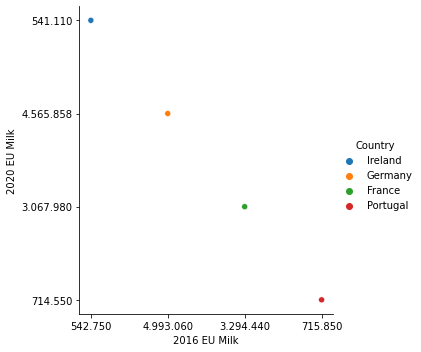

In [20]:
################################
# Seaborn Relplot
################################

# This visualises milk production tons (per thousand) for 2016 and 2020
# for Ireland, Germany, France and Portugal.
# 2020 EU milk tons per thousand are on  the Y-axis, with the 2016 tons on the X-axis.

sns.relplot(
    data=milkstats,
    x="2016 EU Milk", y="2020 EU Milk", hue="Country"
)

<AxesSubplot:xlabel='Country', ylabel='2020 EU Cows'>

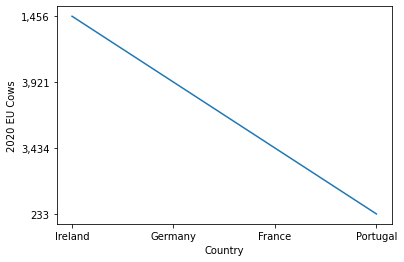

In [21]:
################################
# Seaborn Lineplot
################################

# This visualisation plots the ammount of dairy cattle for 2020 from Ireland to Portugal.
# The line reflects the order of rows in the dataframe and the values in the '2020 EU Cows' column.


sns.lineplot(data=milkstats, x='Country', y='2020 EU Cows')

<AxesSubplot:xlabel='2018 EU Milk', ylabel='2018 EU Cows'>

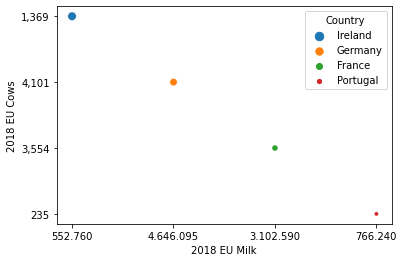

In [22]:
################################
# Seaborn Scatterplot
################################

# The scatterplot uses colour and point size alongside positioning on the
# X and Y axis to illustrate the ammount of milk yielded (per thousand tons)
# and the ammount of dairy cattle in each country (per thousand).
# The use of colour coding helps the viewer quickly identify the datapoints on the graph.


sns.scatterplot(x='2018 EU Milk',y='2018 EU Cows', data=milkstats, hue='Country', size='Country')

---
## 6. Insights

- Derive five valuable insights from the analysis
- Justify your insights with reference to the charts or analysis

Grouping selected data for the chosen countries, milk production figures and dairy cow populations allowed the complex datasets to become easy to digest.

The visualisations confirm that dairy milk production is proportionate to the ammount of dairy cows in each country.

When the four selected country's dairy industries are placed on a graph together the plot line moves steadily and sharply from Ireland at the highest of the selection subsequentially to Germany, France and Portugal.


Admittedly the selected examples are straightfoward to understand from the figures supplied and act as a test case, however the visualisations do help further communicate accross the findings in an accessible manner. The figures are yearly only, so having month by month results for each country could yield interesting variations based on seasonal fluctuations. Further factors that could be considered are how much milk is sold as drinking milk and how much goes into dairy ingredients such as butter, cream and protein powder for sports nutrition, and in which proportions they are divided.

---
## 7. Machine Learning

- Describe what kind of prediction you could perform in future using machine learning and/or deep learning
- Would you use classification or regression methods?

Machine learning is useful when there is too much data to handle by a human under normal conditions. The kind of predictions that could be made using machine learning include predicting future milk output and dairy herd sizes based on past information. A greater ammount of past data over a long time period allows for greater accuracy in predictions.

A prediction that could done in the future using machine learning or deep learning would be to use on-site sensor to get all the information on milk production directly from the farms where it is being collected in the different areas of the country.  This would be an automated and live process. Internet connected sensors on the form would track the milk input each month when collected. 

I would use classification rather than regression since it is best used for working with several distinct data streams, whereas regression is best suited for one continuous value quantity.